In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 300
sns.set_theme(style="whitegrid")
plt.rcParams.update(
    {
        "axes.linewidth": 1,
    }
)

In [2]:
with open("log/log.txt", "r") as f:
    ll = f.readlines()
    df = pd.DataFrame([eval(l) for l in ll])
df["original_epoch"] = df["epoch"]
df["epoch"] = df.index

In [11]:
starts = np.array(df["original_epoch"] == 0).nonzero()[0]
ends = np.append((starts - 1)[1:], len(df))
ranges = list(zip(starts, ends))
ranges

[(0, 299),
 (300, 300),
 (301, 301),
 (302, 334),
 (335, 534),
 (535, 544),
 (545, 597),
 (598, 670)]

In [4]:
df_for_plot = df[
    [
        "test_96_acc1",
        "test_96_acc5",
        "test_192_acc1",
        "test_192_acc5",
        "test_384_acc1",
        "test_384_acc5",
        "epoch",
    ]
].melt(id_vars="epoch", value_name="testing accuracy %")
df_for_plot["resolution"] = df_for_plot["variable"].apply(lambda x: x.split("_")[1])
df_for_plot["top-k"] = df_for_plot["variable"].apply(
    lambda x: x.split("_")[2].replace("acc", "k=")
)

In [5]:
# r = ranges[0]
# df_for_plot.query(f"epoch>={r[0]} and epoch<={r[1]}")

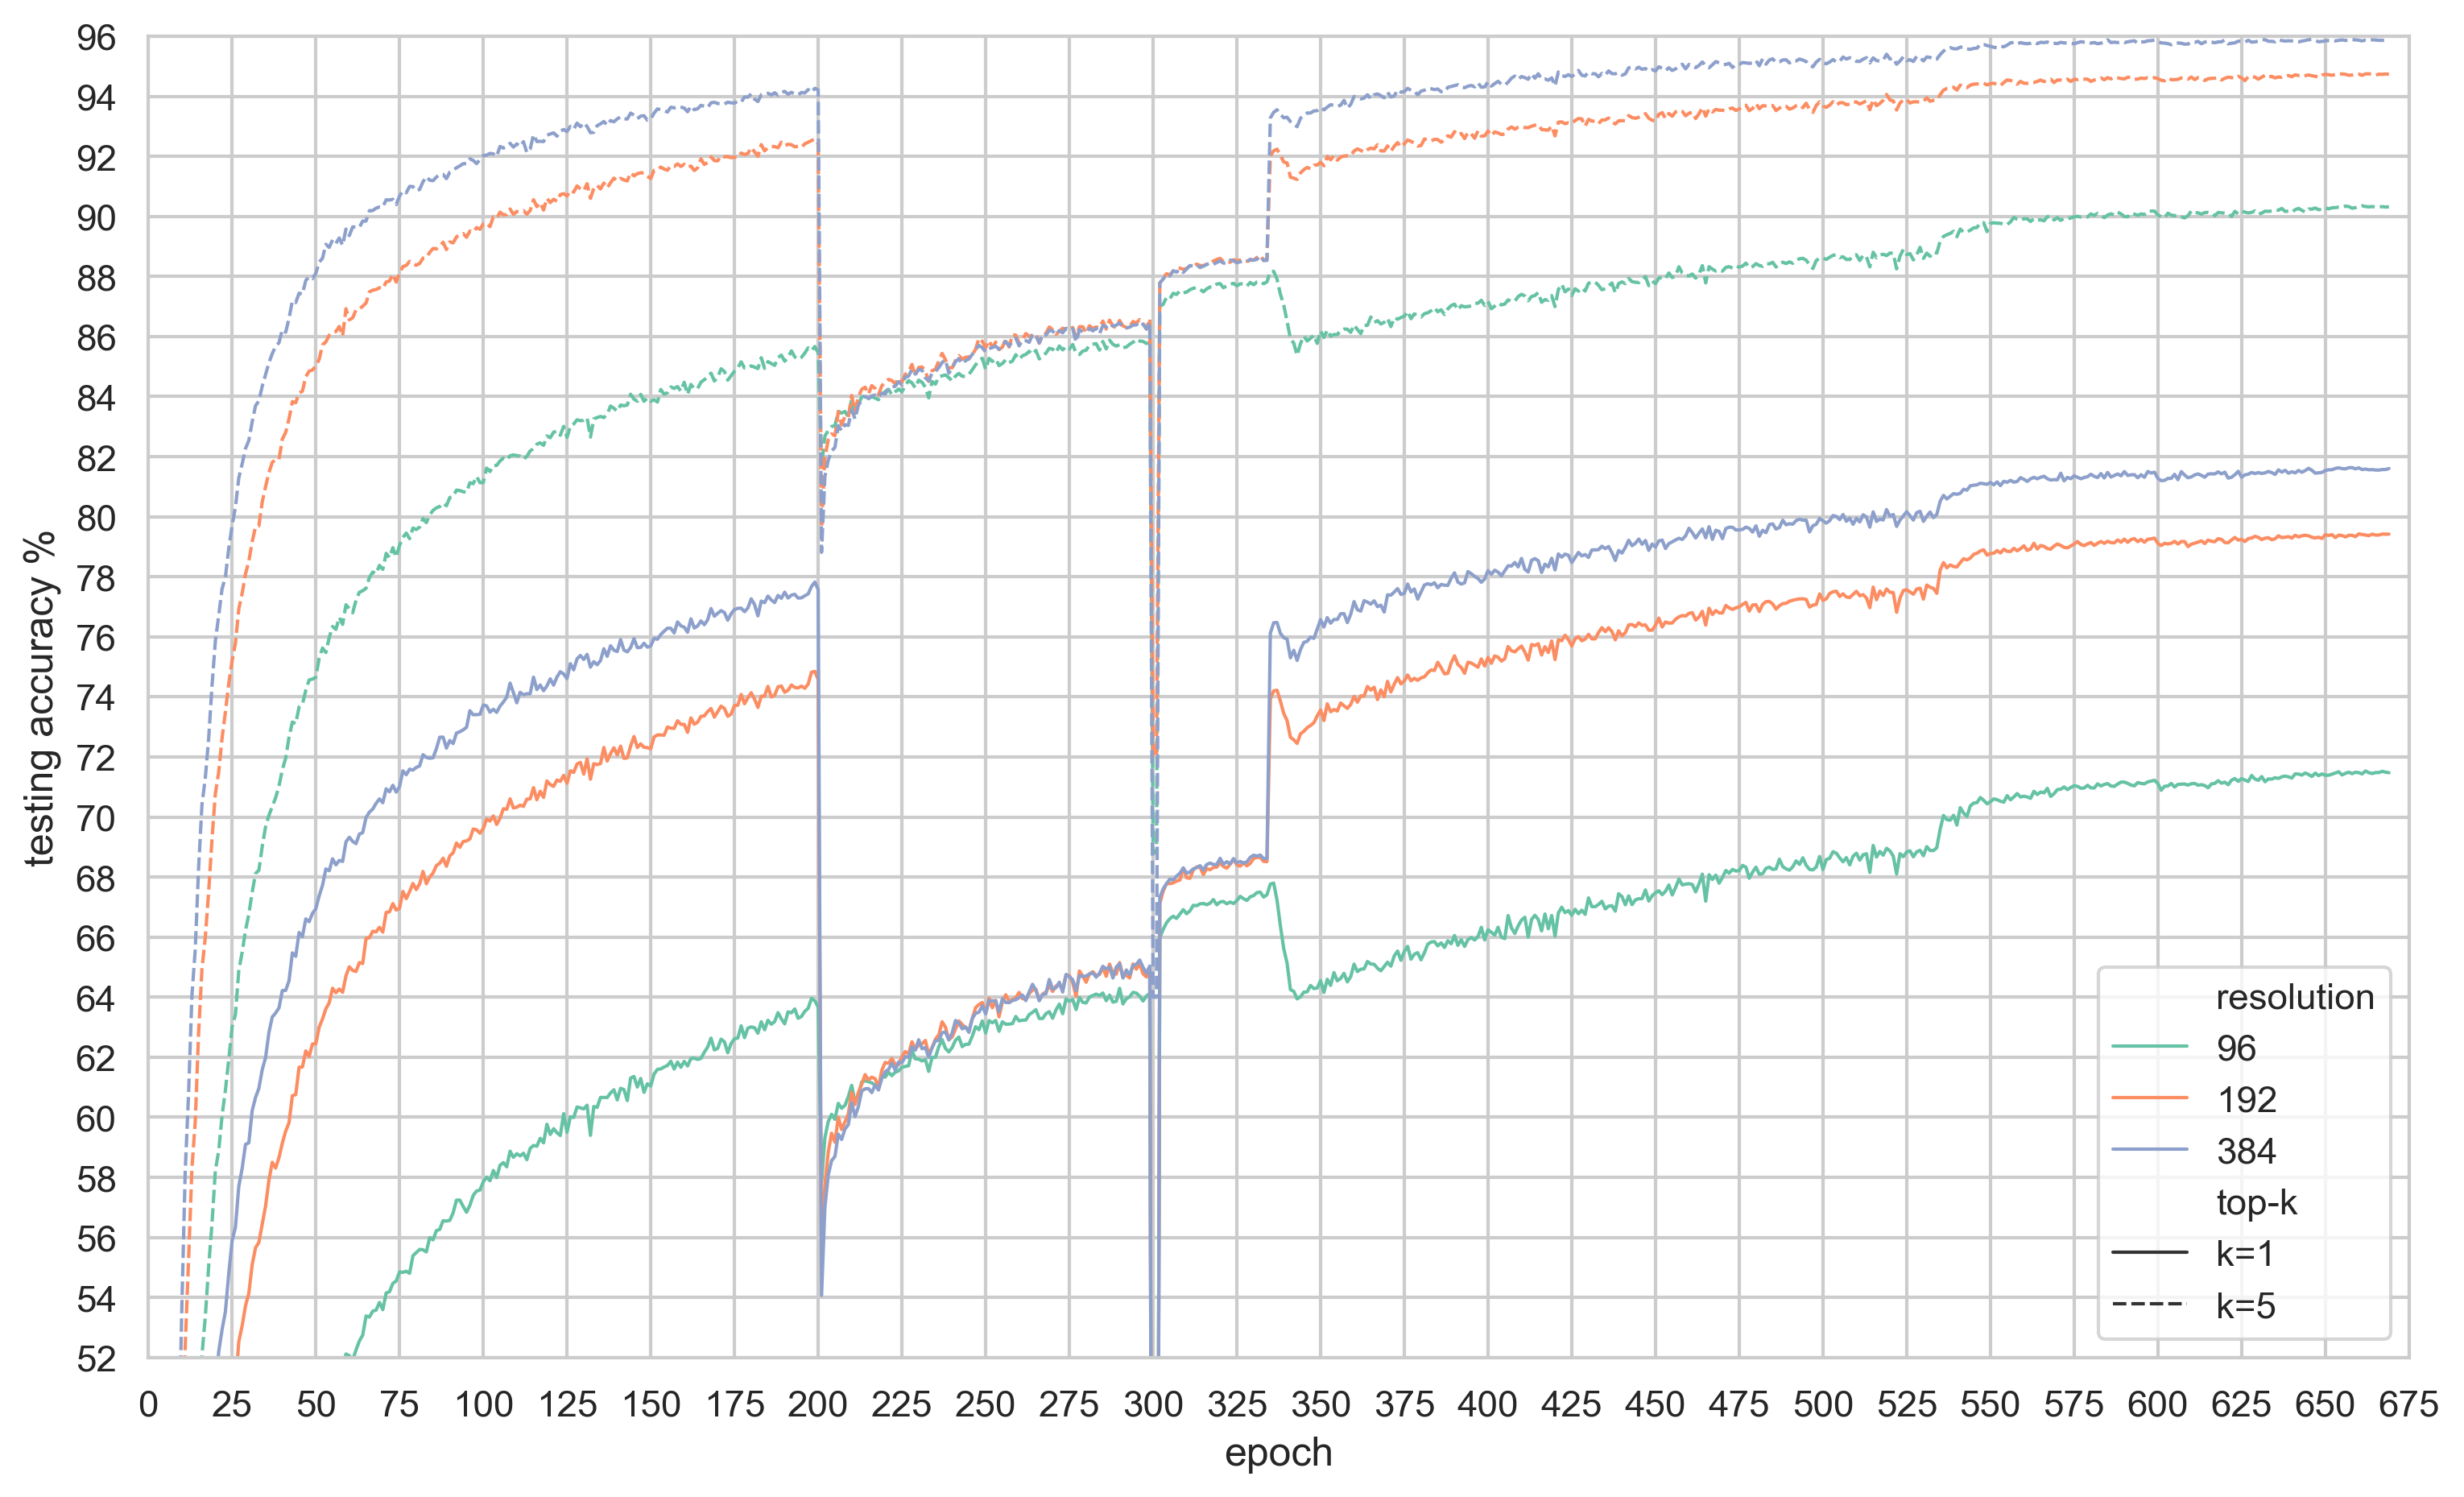

In [6]:
fix, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=df_for_plot,
    x="epoch",
    y="testing accuracy %",
    hue="resolution",
    style="top-k",
    palette="Set2",
    linewidth=1,
    ax=ax,
)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
xrange = (0, 675)
yrange = (52, 96)
plt.xlim(*xrange)
plt.xticks(list(range(*xrange, 25)) + [xrange[1]])
plt.ylim(*yrange)
plt.yticks(list(range(*yrange, 2)) + [yrange[1]])
plt.tight_layout(pad=0)
plt.savefig("cf_test_acc.png")
plt.savefig("cf_test_acc.svg")

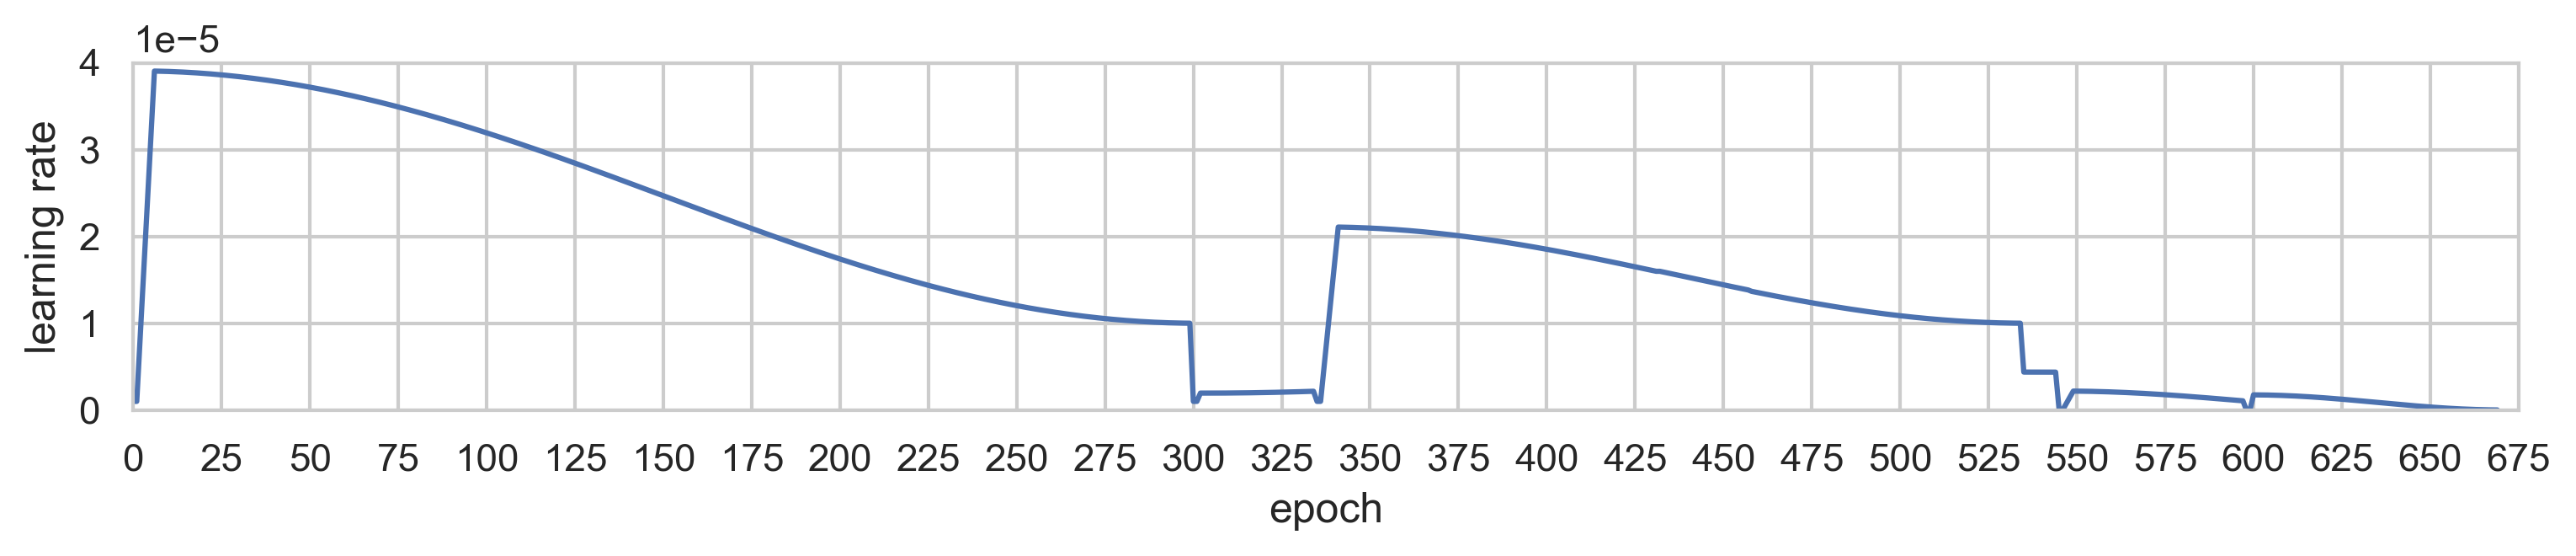

In [7]:
fix, ax = plt.subplots(figsize=(10, 2))
sns.lineplot(df["train_lr"], ax=ax)
# ax.set(yscale='log')
plt.xlim(*xrange)
plt.xticks(list(range(*xrange, 25)) + [xrange[1]])
plt.ylim(0, 4e-5)
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.tight_layout(pad=0)
plt.savefig("cf_lr.png")
plt.savefig("cf_lr.svg")

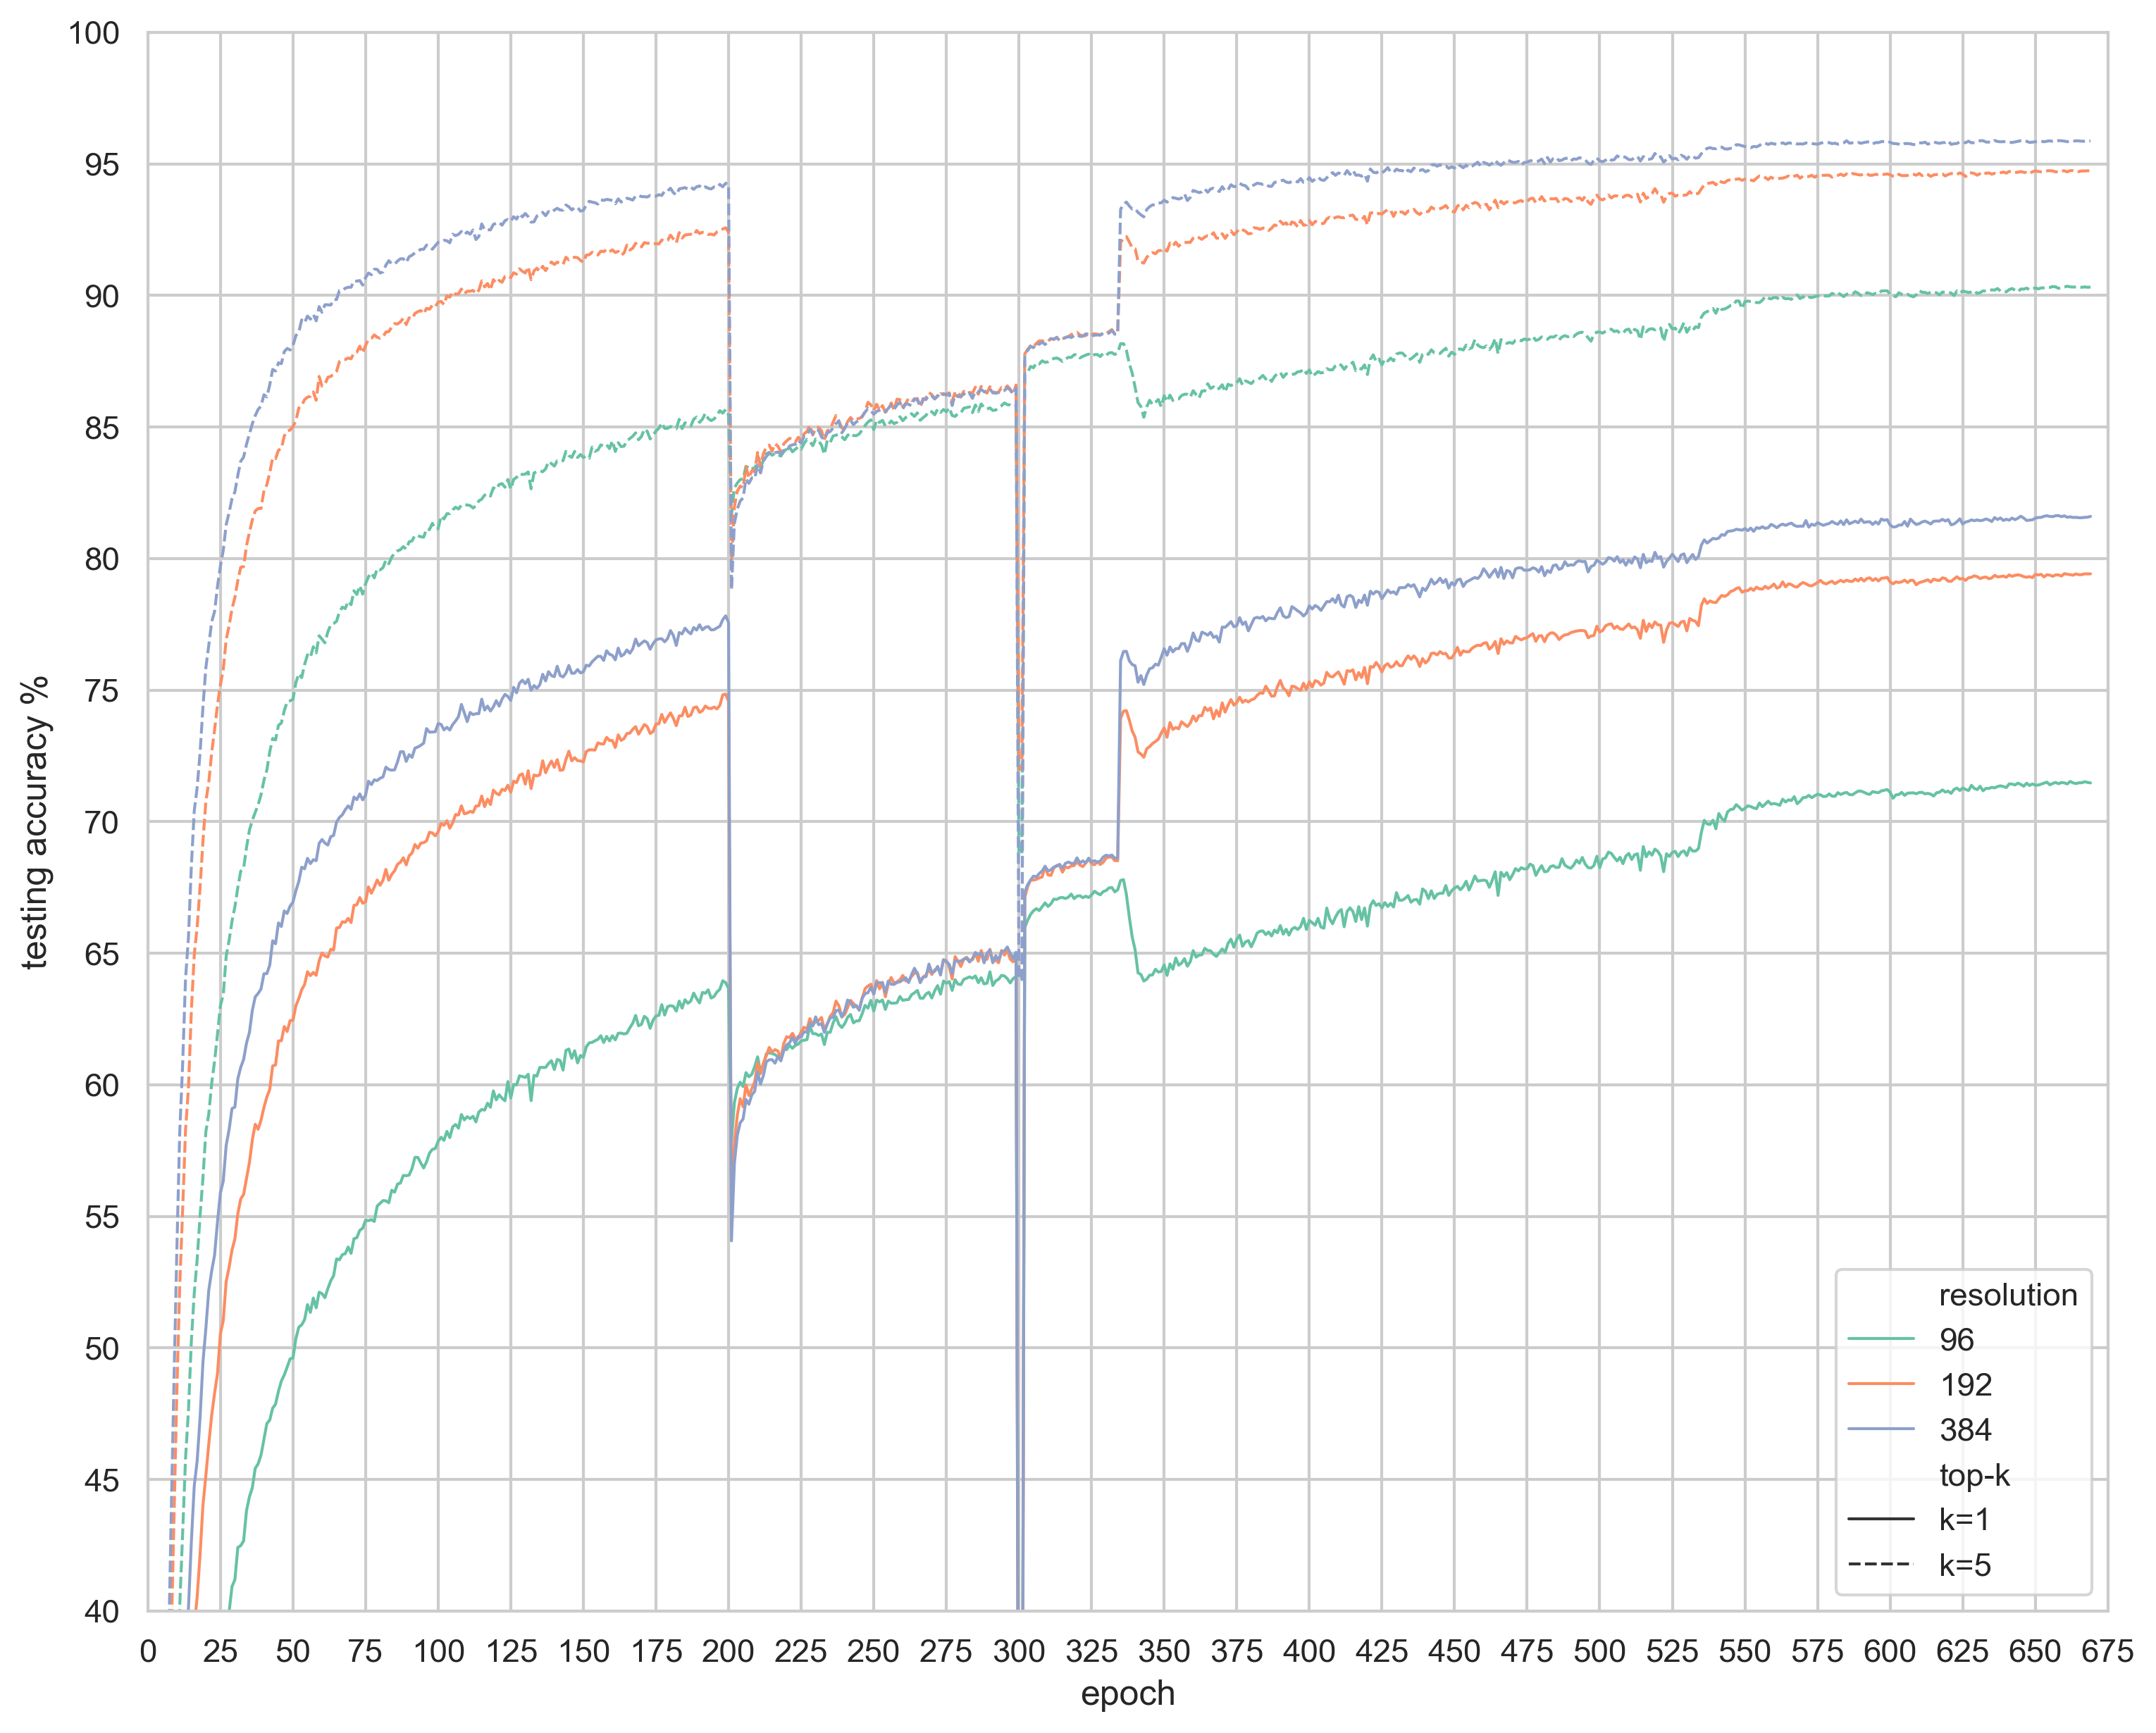

In [8]:
fix, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(
    data=df_for_plot,
    x="epoch",
    y="testing accuracy %",
    hue="resolution",
    style="top-k",
    palette="Set2",
    linewidth=1,
    ax=ax,
)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
xrange = (0, 675)
yrange = (40, 100)
plt.xlim(*xrange)
plt.xticks(list(range(*xrange, 25)) + [xrange[1]])
plt.ylim(*yrange)
plt.yticks(list(range(*yrange, 5)) + [yrange[1]])
plt.tight_layout(pad=0)
plt.savefig("cf_test_acc_zoom.png")
plt.savefig("cf_test_acc_zoom.svg")

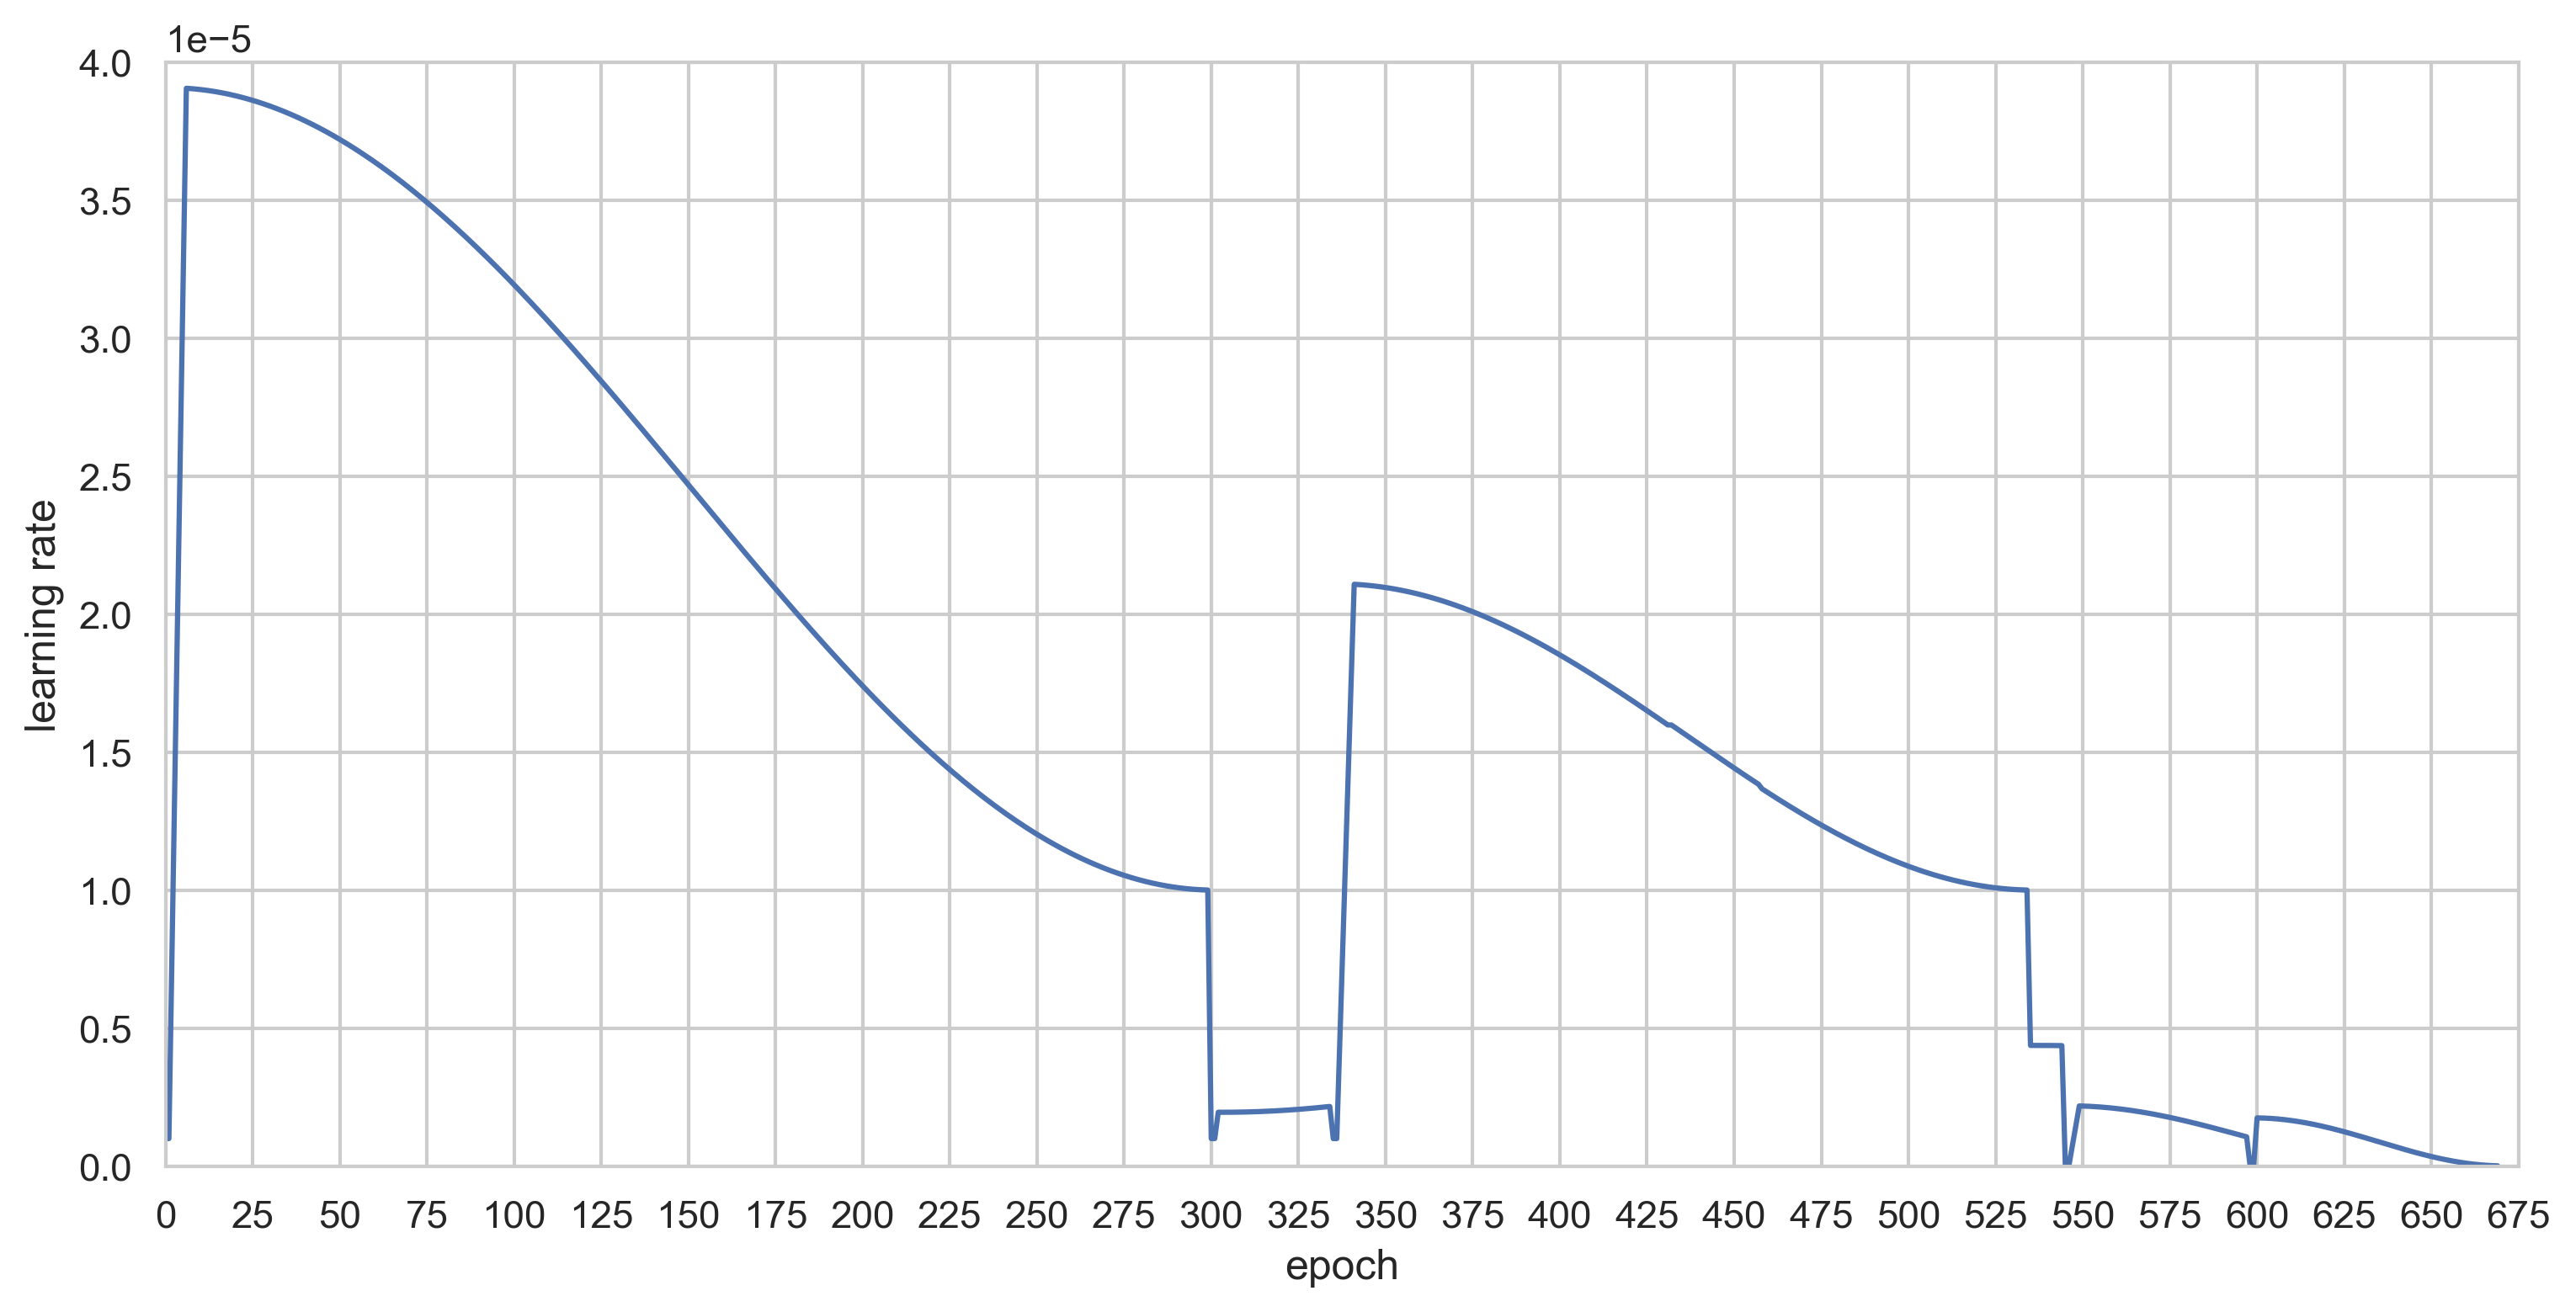

In [9]:
fix, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(df["train_lr"], ax=ax)
# ax.set(yscale='log')
plt.xlim(*xrange)
plt.xticks(list(range(*xrange, 25)) + [xrange[1]])
plt.ylim(0, 4e-5)
plt.xlabel("epoch")
plt.ylabel("learning rate")
plt.tight_layout(pad=0)
plt.savefig("cf_lr_zoom.png")
plt.savefig("cf_lr_zoom.svg")